<div style="text-align:center">
<h1>Introducing Pandas</h1>
<h2>7SSG2059 Geocomputation 2018</h2>
</div>

# The Importance of Data Exploration

After a couple of weeks getting to grips with Python itself, we're now going to start working with some real data. 


One of the first things that we do when working with any new data set is to familiarise ourselves with it. There are a _huge_ number of ways to do this, but there are no shortcuts to:

<ul>
  <li>a. Reading about the data (how it was collected, what the sample size was, etc.)</li>
  <li>b. Reviewing any accompanying metadata (data about the data, column specs, etc.)</li>
  <li>c. Looking at the data itself at the row- and column-levels</li>
  <li>d. Producing descriptive statistics </li>
  <li>e. Visualising the data using plots </li>
</ul>

In fact, you should use _all_ of these together to really understand where the data came from, how it was handled, and whether there are gaps or other problems. If you're wondering which comes first, the concept of  _start with a chart_ is always good.  But this week we want you to get a handle on pandas itself so although we will do some plotting of charts, we'll focus on a-d. There will be much more on plotting charts next week.

## 1. What is Pandas?

Pandas stands for 'Python Data Analysis Library'; it is designed to provide data scientists working in Python with a set of powerful tools to load, transform, and process large-ish data sets. As a result, it has become something of a *de facto* standard for online tutorials and many of the lessons that you can find online will make use of pandas at some point.

Beyond what we provide below there are [numerous](http://lmgtfy.com/?q=introduction+to+pandas+python) useful introductions; [one of our favourites](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) is from Greg Reda, and there are some [good videos](https://youtu.be/TSsSWuhBpmY) on [our YouTube channel](https://www.youtube.com/playlist?list=PLJ5Y5hxm-0W7rOOYBHf6KC6QNnWOi09kh). And of course, there’s [TONS of stuff](http://stackoverflow.com/questions/tagged/pandas) on StackOverflow. If you want an actual physical book, you might try [McKinney (2017)](http://shop.oreilly.com/product/0636920050896.do).

However, one thing you will really want to bookmark is [the official documentation](http://pandas.pydata.org/pandas-docs/stable/) since you will undoubtedly need to refer to it fairly regularly. _Note_: this link is to the most recent release. Over time there will be updates published and you _may_ find that you no longer have the most up-to-date version. If you find that you are now using an older version of pandas then you'll need to track down the _specific_ version of the documentation that you need from the [home page](http://pandas.pydata.org).

You can always check what version you have installed like this:
```python
import pandas as pd
print(pd.__version__)
```
*Note*: this approach isn't guaranteed to work with _every_ package, but it will work with most of them. Remember that variables and methods starting and ending with '`__`' are **private** and any interaction with them should be approached very, very carefully.

First we need to import pandas:

In [3]:
import pandas as pd
print(pd.__version__) # Not necessary every notebook

0.25.1


What we have done here is `import` pandas with an alias, _pd_. So now we can call pandas using `pd` instead of having to type out pandas in full each time (remember, programmers are lazy). You will need to run the line `import pandas as pd` _once_ in every notebook where you want to use pandas; you can use whatever alias you like but we'll assume you always use `pd` in GSA modules and that's what most examples online use as well..  

If pandas imported properly, we can now look at the help file for a pandas `DataFrame` using:

In [2]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
 |  
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and later.
 |  
 |      .. versionchanged :: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order
 |         Python 3.6 and later.
 |  
 |  index : Index or array-like
 |      Index 

Wow! The help documentation for the DataFrame is not just a bit longer than anything we've seen before, it's massively longer! That's because pandas is much more sophisticated than anything we've looked at before. There's probably quite a lot of intimidating terminology in there too... Right from the start we get things like "Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns)." 

### You've already invented pandas!

Here's the thing: in the [last notebook](https://render.githubusercontent.com/view/ipynb?commit=bdf5a7b1388d8c22db7ca9ff34cb71f61131dc35&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6b696e677367656f636f6d702f67656f636f6d7075746174696f6e2f626466356137623133383864386332326462376361396666333463623731663631313331646333352f50726163746963616c2d30322d46756e6374696f6e73253230616e642532305061636b616765732e6970796e62&nwo=kingsgeocomp%2Fgeocomputation&path=Practical-02-Functions+and+Packages.ipynb&repository_id=67207954&repository_type=Repository#Why-'Obvious'-is-Not-Always-'Right') ([Download](https://raw.githubusercontent.com/kingsgeocomp/geocomputation/master/Practical-02-Functions%20and%20Packages.ipynb)) we came close to writing something like pandas from scratch. That's because pandas takes a column-view of data in the same way that our Dictionary-of-Lists did, it's just that it's got a lot more features than our 'simple' tool does. That's why the documentation is so much more forbidding and why pandas is so much more powerful.

But at its heart, a pandas `DataFrame` (`df` for short) is a collection of data `Series` (i.e. columns) with an index. Each `Series` is like one of our column-lists from the last notebook. And the `df` is like the dictionary-of-lists that held the data together. You've seen this before, so you already _know_ what's going on... or at least you now have an _analogy_ that you can use to make sense of pandas:
```python
myDataFrame = {
    '<column name 1>': <Series 1>,
    '<column name 2>': <Series 2>,
    '<column name 3>': <Series 3>
}
``` 

Let's start with `Series` before loading the data as a `df`

## 2. Pandas `Series`
The official documentation for `Series` is [here](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). But as [Greg Reda](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) puts it so clearly; 

> _“a Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labelled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.”_ 

### Working with a Series

This indexing is very similar to what we have used in the past for lists. 

In [6]:
s = pd.Series([7, 'Bristol', 3.14, -1789, 'Happy Birthday!'])
print(s)

0                  7
1            Bristol
2               3.14
3              -1789
4    Happy Birthday!
dtype: object


Then, to get to item 1 in the `Series`:

In [7]:
print(s[1])

Bristol


Looks pretty similar to how we would index (access) a list, right? **Except...** notice that printing out the series showed a number (0..4) ndext to every element in the list; that should be a _clue_ that we're not using a normal list any more. That number is the *index*: this type of index is a lot more complicated than what we did when using indexes to access elements of a list, but they've used the same name because that describes its function.

## 3. Pandas `Index`

By default, pandas uses a 0-based integer sequence for its indexes (*i.e.* if you don't tell it do anything else, your index will be the numbers 0..n). But one of neat things about pandas `Series` is that you can set the index to anything you like. 

For example, let's imagine that you've calculated some summary statistics from a much larger data set and you want the name of the statistic to be the index value:

In [10]:
mySummary = pd.Series([7, 1, 3.23, 0.88],  index=['max', 'min', 'mean', 'std'])
print(mySummary)

max     7.00
min     1.00
mean    3.23
std     0.88
dtype: float64


So *now* this looks a little like creating a dictionary with keys instead of a list with integer indexes since we can access values in the `Series` using the `index` we just specified, but it's still a _one-dimensional list_ (see definition above) since we only have one observation (_i.e._ data point) for each row.:

In [9]:
print(mySummary['min'])

1.0


Or, we could do something like:

In [11]:
print(mySummary.min())

0.88


Notice the difference between the output for the last two `print()` statements? 

This is because we used two different ways to access the contensts of the `Series`:
1. the first uses the index value we specified (_min_) to get the second value in the `Series`, 
2. the second uses the `.min()` [method](http://pandas.pydata.org/pandas-docs/stable/api.html#computations-descriptive-stats) to find the minimum value in the Series. 

That's actually pretty confusing, so we'd really recommend trying to _avoid_ using words like these as part of your index if you possibly can -- fortunately, that shouldn't happen too often: the only time you'll encounter it as *normally* part of *using* pandas is when you summarise a dataframe! However, the difference between an **index** value and a **data** value is crucial, so make sure you understand how these two lines of code differ and why their output is different -- ask if you’re not sure.

#### Questions!

**Also** notice one other thing: right at the bottom of `print(mySummary)` the `dtype` has changed from the first example: it's changed from `object` (the default) to `float64`. Try thinking this out for yourself:

1. What does `dtype` mean?

2. What is the difference between `object` and `float64` and why might it matter to pandas?

Add your answer to this cell by just double-clicking on any of the next here and then writing your answer next to questions 1 and 2. You can _always_ add your own annotations, explanations, comments, complaints directly into a notebook!

### Boolean Indexes

We can also use a _boolean index_ (remember this from [Code Camp notebook 4](https://kingsgeocomputation.org/teaching/code-camp/code-camp-python/lessons/)?) to select or filter particular elements of the `Series` that meet certain conditions using logical operators like `==` or `>` (so this is like a conditional statement). For example, let's create a new `Series`:

In [12]:
mySeries = pd.Series([100, 200, 300, 400], index = ['one', 'two', 'three', 'four']) 

We can pandas to find all elements of the `Series` with values greater than 250 and this will be returned as a Boolean index (**hint**: look at the `dtype`):

In [13]:
mySeries > 250

one      False
two      False
three     True
four      True
dtype: bool

***Think about it***: thats's already useful since we didn't have to write a `for` loop in order to find every element of `mySeries` that was greater than 250! But we can use that boolean index to retrieve *only* those values of the series:

In [14]:
mySeries[mySeries > 250]

three    300
four     400
dtype: int64

See if you can work out what  the last line of code is doing. It’s quite tricky:
1.	First it runs the conditional for *all* elements of `mySeries` (i.e. checking which values are greater than 250), 
2.	This produces a Boolean Series of `True`/`False` values the same length as the original series
3.	Then this returns all the elements in `mySeries` for which the partner values in the Boolean series are `True`. 

Think about it!

Here’s another example but, first, just by reading this code can you work out what it is doing?

**Answer**: ???

In [ ]:
myEastings  = pd.Series([7063197, 6708480, 6703134, 7538620], index = ['Liverpool', 'Bristol', 'Reading', 'Glasgow'])

myEastings[myEastings < 7000000]

# 4. Pandas `DataFrames`

We’ll often with `Series` as we go along, but usually we have more than just a few observations in one column of data (i.e. a one-dimensional data set. Let's step this up slowly by working with two-dimensional data in pandas; that means we now need to use the data structure called a `DataFrame`. We saw the help documentation for this above, but hopefully the rest of this notebook will be a little more comprehensible... 

Official documentation for DataFrame is [here](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe). But again, [Greg Reda](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) puts it a little more intuitively:

> _“A DataFrame is a tabular data structure comprised of rows and columns, akin to a spreadsheet, database table ... **You can also think of a `DataFrame` as a group of `Series` objects that share an index (the column names).**”_ 

Or, in terms of Dictionaries-of-Lists (what you did last week), a `DataFrame` could be thought of as a `dict` of `list` objects that share a `key`. 

Indeed, we could actually create our own `df` from a Dict-of-Lists:

In [19]:
d = {'col_one' : [1., 2., 3., 4.],
     'col_two' : [4., 3., 2., 1.]}

df = pd.DataFrame(d)

print(type(df))
print("")
print(df)
print("")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>

   col_one  col_two
0      1.0      4.0
1      2.0      3.0
2      3.0      2.0
3      4.0      1.0

        col_one   col_two
count  4.000000  4.000000
mean   2.500000  2.500000
std    1.290994  1.290994
min    1.000000  1.000000
25%    1.750000  1.750000
50%    2.500000  2.500000
75%    3.250000  3.250000
max    4.000000  4.000000


Bet the nerds found that one cool! (we did). 

Just to clarify what we did there:
1. We created an object `d`, which is a dict-of-lists, using basic python 
2. We created an object `df`, which is a pandas `DataFrame`
3. We printed the type of the `df` object (to check it really is a pandas `DataFrame`)
4. We printed the pandas `DataFrame` itself
5. We printed out a summary of the `DataFrame` that gave us some useful summary statistics about each (numerical) column

Check you understand this and ask if you're not sure. 

# 5. Reading and Writing Data 

It’s rare that we would actually want to write code to create a `DataFrame`. Usually, we **read** existing data into the `df`; this could be a data stored on a remote computer (*i.e.* on the Internet) or from a local file (on your hard drive). After manipulation and analysis we may also want to **save** a `df` for later use. To faciliate reading (and writing) files, pandas has a [variety of functions](http://pandas.pydata.org/pandas-docs/stable/io.html).

We'll look at how we read and write existing data using pandas functions by taking three steps:
1. read the LSOA data file from a remote location
2. write the LSOA data to a file on your local HDD
3. (re)read the LSOA data from your local HDD.

You do _not_ need to run this entire process every time you start this or any other notebook. We are just demonstrating the flexibility of pandas. In future you will likely want to just work with your local file, or if you need to download the data then you do this _once_ when you first start up the notebook and then never run that code again! 

We have stored the initial LSOA data online in a file named `LSOA Data.csv.gz`. This file is in [csv format](https://en.wikipedia.org/wiki/Comma-separated_values), but compressed (using the [gzip algorithm](https://en.wikipedia.org/wiki/Gzip)) to reduce data storage and transfer demands. 

The pandas `read_csv` function can read data saved in csv format _and_ which has been compressed directly into a `df`. Similarly, the `to_csv` function can write a pandas `df` in csv format _and_ compress the file using gzip.


### Read a remote data file in pandas

Assuming we're connected to the Internet, we can read data from a remote server into the memory of our computer so that we can work with it. Just to drive home how pandas expands on what we did last week, let's read the large `CitiesWithWikipediaData.csv` file that we worked with last week into a pandas data frame called `my_df`:

In [54]:
my_df = pd.read_csv(
    'http://bit.ly/2iIK9bA',
    low_memory=False) # The 'low memory' option means pandas doesn't guess data types

print("Done!")

Done!


All being well, the code above should not have produced an error when running and printed `Done!` when the pandas data frame was loaded. To see the result of running the code, let's check what type of object `my_df` is: 

In [55]:
type(my_df)

pandas.core.frame.DataFrame

If you see `<class 'pandas.core.frame.DataFrame'>` that's great! This is telling that you that you have created a pandas `df`. Let's have a quick look at the `DataFrame` we've created:

In [56]:
my_df.head()

,id,Name,Rank,Population,Longitude,Latitude,Area,Density,Subs,MetroArea,Changes,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Greater London,1,9787426,-18162.92767,6711153.709,1737.9,5630.0,"London Boroughs, Hemel Hempstead, Watford, Wok...",London,"The addition of Guildford, Harlow, Bracknell a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Greater Manchester,2,2553379,-251761.80200,7073067.458,630.3,4051.0,"Manchester, Salford, Bolton, Stockport, Oldham...",Manchester,"The addition of Golborne, Glossop and Newton-l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,West Midlands,3,2440986,-210635.23960,6878950.083,598.9,4076.0,"Birmingham, Wolverhampton, West Bromwich, Dudl...",Birmingham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,West Yorkshire,4,1777934,-185959.30220,7145450.207,487.8,3645.0,"Leeds, Bradford, Wakefield, Huddersfield, Dews...",Leeds-Bradford,The addition of Halifax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Glasgow,5,1209143,-473845.23890,7538620.144,368.5,3390.0,"Glasgow, Paisley, Clydebank",Glasgow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Notice** that there is one column (the first one on the left next to `id`) has no label in bold type? *That* is the index. It is created automatically for us when we load the data frame *unless* we tell pandas to use one of the columns in the data.

For now, think about how useful to pandas `read_csv` function is: instead of having to write some kind of _readRemoteCSV_ function ourselves, and then manually create a Dictionary-of-Lists from that remote file, we just told pandas to read it for us and it automagically converted it to a data structure that we we will be able use lots of functions to analyse (as we'll see below). You'll notice that it even figured out where the column names were. 

### Writing a `DataFrame` to a local file 

Writing a file to disc (i.e. saving it for later use), is just as easy as reading the deata. The following code writes the `my_df` `df` to a csv file using the `to_csv` pandas method: 

In [64]:
my_df.to_csv('cities.csv', index=False)

There are two things to note here: 
1. we have passed a value of `False` to the `index` argument - read what that does [in the documentation](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)
2. we have passed a value of `lsoa.csv` as a filename to use for the csv file created

As the filename does not specify the full path, the data will be written to whatever your current working directory is. For a Jupyter notebook like this, that means the directory where the notebook itself is saved. Use Finder or File Explorer to go view the file you have just saved to HDD. 

Make sure you can find the file! It is important you understand where and how pandas and python write data. Ask if you need help.

You may have noticed that the csv file is reasonablly large in terms of the space used on the HDD (~7 MB). If we want to save some space we could use the gzip compression option:

In [24]:
# Save this locally to avoid having to re-download it every time we start this notebook
my_df.to_csv('cities.csv.gz', compression='gzip', index=False)

Check you can find the file just created on your HD: if you're using JupyterLab you should have just seen the file appear in the navigation area on the left side of your screen. 

It is up to you to decide how you want to store your data, so think about these two different methods what they entail for reading data back into a `DataFrame` later (Google or ask for advice on [best practice](https://library.stanford.edu/research/data-management-services/data-best-practices) if you want).  

Before we read the data back in, to ensure the reading works properly we'll delete the`my_df` object:

In [25]:
del(my_df)

print(type(my_df))

NameError: name 'my_df' is not defined

That's one bit of code you actually _do_ want an error from! The error shows we have successfully removed the `df` object from memory (so python can't find it when we ask what type it is).  

### Reading data from a local file to a pandas `DataFrame`

Above, we wrote the data to two types of file - one compressed and one uncompressed. Reading these files back into memory from a local HDD is just as easy as reading from a remote location. 

First, reading the compressed file:

In [26]:
gz_df = pd.read_csv('cities.csv.gz', compression='gzip') 
print(type(gz_df))
del(gz_df) # And tidy up -- we don't need this again.

<class 'pandas.core.frame.DataFrame'>


Similarly for the the uncompressed csv file:

In [27]:
my_df = pd.read_csv('cities.csv')
print(type(my_df))

<class 'pandas.core.frame.DataFrame'>


This is all pretty straightforward _assuming python knows where your data are stored on the HDD_. Here, because we do not provide a full path the file is read from the current directory. In this case that should be oay (because we only just wrote the data to disk, without specifying a location), and we can see the read must have been at least partially successful as there was no error message and the object created is a pandas `df`. 

However, if your data are saved in a different location you will need to provide the full path to the location of a file on your HDD. For example, assuming you have a file named _lsoa2.csv_ in your downloads, you might do something like this:

In [ ]:
new_df = pd.read_csv('C:\Users\K1111111\Downloads\lsoa2.csv')

Unless my some miraculous coincidence your username is _k1111111_ and you really _do_ have a file named _lsoa2.csv_ in your Downloads folder, you should receive an error when you run the code above. Read the error and check you can see where python is trying to tell you it can't find the file you're trying to read. You may get such an error in future if you mis-specify a path or mis-spell a file name (so get used to this - don't be scared of error messages, they are _trying_ to help you!). 

Also remember that how you specify the path will differ between Windows (using \\) and Max (using \/) - read more [here](https://www.howtogeek.com/181774/why-windows-uses-backslashes-and-everything-else-uses-forward-slashes/) if you're interested.

### Quickly viewing the contents of a `DataFrame`

So we think we've read our data in correctly, but really need to check by looking at it. Later in the practical we'll see some of the useful plotting functionlity provided by pandas. 

But how can we quickly check the contents of what has been created without plotting? This is where the pandas `head()` method is useful:

In [57]:
my_df.head()

,id,Name,Rank,Population,Longitude,Latitude,Area,Density,Subs,MetroArea,Changes,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Greater London,1,9787426,-18162.92767,6711153.709,1737.9,5630.0,"London Boroughs, Hemel Hempstead, Watford, Wok...",London,"The addition of Guildford, Harlow, Bracknell a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Greater Manchester,2,2553379,-251761.80200,7073067.458,630.3,4051.0,"Manchester, Salford, Bolton, Stockport, Oldham...",Manchester,"The addition of Golborne, Glossop and Newton-l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,West Midlands,3,2440986,-210635.23960,6878950.083,598.9,4076.0,"Birmingham, Wolverhampton, West Bromwich, Dudl...",Birmingham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,West Yorkshire,4,1777934,-185959.30220,7145450.207,487.8,3645.0,"Leeds, Bradford, Wakefield, Huddersfield, Dews...",Leeds-Bradford,The addition of Halifax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Glasgow,5,1209143,-473845.23890,7538620.144,368.5,3390.0,"Glasgow, Paisley, Clydebank",Glasgow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All being well, you should have just printed the first five lines of the `DataFrame`. (If not, you might need to go back to code above to read the data into the `my_df` object - ask if you need help.)

We can explore some of the [attributes](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) of the data frame. For example the `shape` attribute is a tuple:

In [58]:
print(my_df.shape) 

(72, 20)


This should show you that `my_df` has 72 rows and 20 columns. To print this more nicely we could do something like:

In [59]:
print("Number of columns is " + str(my_df.shape[1]))
print("Number of rows is " + str(my_df.shape[0]))

Number of columns is 20
Number of rows is 72


Check you understand what's going on there; how did we access the column and row values individually?

Note that we use `shape` not `shape()` - this is because `shape` is an attribute of the `DataFrame`, not a pandas method (function). You can compare many of the attributes and methods of pandas `DataFrames` [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). For some [unknown](https://stackoverflow.com/a/19483025) reason, some attributes are not shown in the full documentation. For example, the `columns` _attribute_ is also useful: 

In [60]:
print(my_df.columns)

Index(['id', 'Name', 'Rank', 'Population', 'Longitude', 'Latitude', 'Area',
       'Density', 'Subs', 'MetroArea', 'Changes', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')


So that prints out all of the column names that were shown in **bold** up above. But notice that it's an _Index_! That's (to simplify in a useful way) because it isn't a `Series` containing data; so Indexes hold information _about_ rows and columns, while a Series holds _data_.

It was want to get at the columns names as `list` of `values` (which will be more useful for writing code):

In [61]:
print(my_df.columns.values)

['id' 'Name' 'Rank' 'Population' 'Longitude' 'Latitude' 'Area' 'Density'
 'Subs' 'MetroArea' 'Changes' 'Unnamed: 11' 'Unnamed: 12' 'Unnamed: 13'
 'Unnamed: 14' 'Unnamed: 15' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19']


Note the subtle difference between the outputs of the last two lines of code (e.g. one starts, `Index`, the other does not; one has only [ ], the other ( ) and [ ]). 

The list of `column.values` points us to a way that we can read in only a subset of the columns from our original data file by specifying a subset to read in: 

In [65]:
colnames = my_df.columns.values[1:4]
print(colnames)
print("")

sub_df = pd.read_csv('cities.csv', usecols=colnames)
print("Shape of sub-setted data frame is: {0}".format(list(sub_df.shape)))

sub_df.head()

['Name' 'Rank' 'Population']

Shape of sub-setted data frame is: [72, 3]


,Name,Rank,Population
0,Greater London,1,9787426
1,Greater Manchester,2,2553379
2,West Midlands,3,2440986
3,West Yorkshire,4,1777934
4,Glasgow,5,1209143


Notices how we have only loaded the columns listed in the `colnames` list? What we have done here is pass a list of the column names that we want to load (called `colnames`) to the `read_csv` method using the `usecols` argument. Also note that there are **many** other arguments we could pass to `read_csv`, as shown [in the documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv). 

We can also read in only a subset of the rows, which can be useful when working with Really Big datasets. For example, while the LSOA data at ~7MB has only around 40 columns and 4,800 rows, larger data sets like the London [InsideAirBnB data](http://insideairbnb.com/get-the-data.html) come in at nearly 50MB, and the OS' OpenRoads data set is more than 500MB! Reading and writing that amount of data will slow things down quite a bit! Sometimes it's easier to work with only a portion of the data while we are doing our coding and then, once we know that we've written things correctly, we do our analysis on the whole data set. 

One way to achieve this right at the start is to specify the number of rows (abbreviated to `nrows`) that you want to load in `pandas`. Using our LSOA data set, for instance, do we really need to start out with all >4,000 rows? Or could we work with 'just' 1,000 to get things started? If we set up our analysis then the answer is: it doesn't matter! We should be able to just run the analysis on the subset of data and then re-run it on the _entire_ data set later (by changing the number of lines we read into memory right at the start of the analysis process).

So to read only 1,000 rows and only the London Data Store columns:

In [66]:
sub_df = pd.read_csv('cities.csv', usecols=colnames, nrows=50)
print(sub_df.shape)

(50, 3)


You'll see a lot more later in term how to more effectively subset and sample data, but this should speed things up quite a bit until we're ready to deal with the whole data set!

That's right, pretty much exactly the same as for the uncompressed file. That's because pandas recognizes the compression tye and uncompresses for us!

So a quick recap of what we've just done before moving on. We:
1. read the LSOA data file from a remote location;
2. wrote the LSOA data to a file on your local HDD in two different formats (compressed and uncompressed);
3. (re)read the LSOA data from your local HDD (in two different formats);
4. explored some different ways to quickly view the shape and content of data that we have read. 


### Setting the Index from a Series

Let's have a nother look at `my_df` and see if we can use a more meaningful index than the numbers `0..n`?

In [67]:
my_df.head(2)

,id,Name,Rank,Population,Longitude,Latitude,Area,Density,Subs,MetroArea,Changes,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Greater London,1,9787426,-18162.92767,6711153.709,1737.9,5630.0,"London Boroughs, Hemel Hempstead, Watford, Wok...",London,"The addition of Guildford, Harlow, Bracknell a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Greater Manchester,2,2553379,-251761.80200,7073067.458,630.3,4051.0,"Manchester, Salford, Bolton, Stockport, Oldham...",Manchester,"The addition of Golborne, Glossop and Newton-l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It probably makes the most sense to set the `Name` to be the index because that is naturally how we want to look up cities. Let's go:

In [68]:
my_df.set_index('Name', inplace=True, drop=True)
my_df.head(2)

,id,Rank,Population,Longitude,Latitude,Area,Density,Subs,MetroArea,Changes,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
Name,,,,,,,,,,,,,,,,,,,
Greater London,1,1,9787426,-18162.92767,6711153.709,1737.9,5630.0,"London Boroughs, Hemel Hempstead, Watford, Wok...",London,"The addition of Guildford, Harlow, Bracknell a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Greater Manchester,2,2,2553379,-251761.80200,7073067.458,630.3,4051.0,"Manchester, Salford, Bolton, Stockport, Oldham...",Manchester,"The addition of Golborne, Glossop and Newton-l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Right now, it's enough to know that you can (and usually *should*) set the index to one of the columns (data series) that you've loaded. The example below will make a *lot* more sense in a few weeks' time, but basically we are taking a sub-set of the observations in `my_df` using *both* row *and* column values: we select both using a list that refers to either the row or the column index!

In [69]:
# And now...
selection = ['Stoke-on-Trent','Coventry','Sunderland','Birkenhead','Reading','Kingston upon Hull','Preston']
cols = ['Longitude','Latitude']
my_df.loc[selection, cols]

,Longitude,Latitude
Name,,
Stoke-on-Trent,-246620.98170,6990197.434
Coventry,-169303.04440,6876688.122
Sunderland,-156142.54450,7336483.090
Birkenhead,-373290.79390,7038726.778
Reading,-113370.91960,6703134.029
Kingston upon Hull,-41707.88464,7124167.211
Preston,-306768.57920,7125401.008


### Exercise: Writing and Reading Data
1. Write `my_df` as a CSV to a different directory (not the directory this notebook is saved in on your HDD.
2. Delete the `DataFrame` object from memory.
3. Read the data back in from the directory to an object named `new_df` and check it has loaded into memory correctly. 
4. Print the top few lines of `new_df` 

In [ ]:
#your code here

### Resetting the DataFrame

Let's re-load the data now just to make sure we're working with the full data set:

In [88]:
my_df = pd.read_csv('cities.csv.gz', compression='gzip', low_memory=False) # Load the data frame
idx   = list(my_df.columns.values).index('Unnamed: 11') # Find the first 'unnamed' column of garbage data
my_df = my_df.iloc[:,:idx] # We'll see what iloc does later, but we are selecting all rows (':') and all columns between 0 and Unnamed: 11 (:idx)
my_df.head(3)

,id,Name,Rank,Population,Longitude,Latitude,Area,Density,Subs,MetroArea,Changes
0,1,Greater London,1,9787426,-18162.92767,6711153.709,1737.9,5630.0,"London Boroughs, Hemel Hempstead, Watford, Wok...",London,"The addition of Guildford, Harlow, Bracknell a..."
1,2,Greater Manchester,2,2553379,-251761.80200,7073067.458,630.3,4051.0,"Manchester, Salford, Bolton, Stockport, Oldham...",Manchester,"The addition of Golborne, Glossop and Newton-l..."
2,3,West Midlands,3,2440986,-210635.23960,6878950.083,598.9,4076.0,"Birmingham, Wolverhampton, West Bromwich, Dudl...",Birmingham,NaN


Onwards, to data description

# 6. Describing Numerical Data in Pandas

Let’s calculate some descriptive statistics for our data. Handily, there is a method we can apply to `DataFrame` objects that returns the standard descriptive statistics:

In [89]:
my_df.describe()

,id,Rank,Population,Longitude,Latitude,Area,Density
count,72.00000,72.000000,7.200000e+01,72.000000,7.200000e+01,68.000000,68.000000
mean,36.50000,37.000000,5.019337e+05,-160383.721227,6.918399e+06,118.266176,3995.794118
std,20.92845,21.590295,1.199693e+06,162696.710564,2.726550e+05,231.859227,489.163635
min,1.00000,1.000000,1.069400e+05,-659942.933700,6.512204e+06,24.800000,3107.000000
25%,18.75000,18.750000,1.482812e+05,-257802.265900,6.714778e+06,35.225000,3657.750000
50%,36.50000,36.500000,2.196220e+05,-157710.494700,6.863271e+06,58.000000,3926.500000
75%,54.25000,54.750000,3.737395e+05,-50190.238135,7.086331e+06,88.500000,4278.500000
max,72.00000,74.000000,9.787426e+06,142539.114900,7.791034e+06,1737.900000,5630.000000


That's a bit faster than trying to calculate all these summary stats in Excel, right? 

Just by calling `describe()`...
1. We've asked Python to describe the `DataFrame` and it has returned a set of columns (actually, it's `DataFrame` itself as we'll see below) with descriptive metrics for each.
2. Note what is _missing_ from this list: where is `Name`? Can you think why it wasn't reported in the descriptives?

As you work through the description code below, you may want to refer back to the shape and contents of the `DataFrame` above...

And we don’t just have to settle for the standard descriptive statistics the `describe()` method [gives us](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html). We can also specify particular percentiles of the data that we would like to view. This is done using the `percentiles` argument. For example to get the 1st and 99th percentiles we would use:

In [92]:
my_df.describe(percentiles = [0.20, 0.80])

,id,Rank,Population,Longitude,Latitude,Area,Density
count,72.00000,72.000000,7.200000e+01,72.000000,7.200000e+01,68.000000,68.000000
mean,36.50000,37.000000,5.019337e+05,-160383.721227,6.918399e+06,118.266176,3995.794118
std,20.92845,21.590295,1.199693e+06,162696.710564,2.726550e+05,231.859227,489.163635
min,1.00000,1.000000,1.069400e+05,-659942.933700,6.512204e+06,24.800000,3107.000000
20%,15.20000,15.200000,1.332476e+05,-295417.647980,6.704203e+06,34.040000,3636.000000
50%,36.50000,36.500000,2.196220e+05,-157710.494700,6.863271e+06,58.000000,3926.500000
80%,57.80000,59.800000,4.728412e+05,-18923.769074,7.115335e+06,106.480000,4345.200000
max,72.00000,74.000000,9.787426e+06,142539.114900,7.791034e+06,1737.900000,5630.000000


Of course, maybe you don't want the report for all columns. Maybe you're just interested in one column:

In [93]:
my_df.Population.describe(percentiles = [0.20, 0.80])

count    7.200000e+01
mean     5.019337e+05
std      1.199693e+06
min      1.069400e+05
20%      1.332476e+05
50%      2.196220e+05
80%      4.728412e+05
max      9.787426e+06
Name: Population, dtype: float64

Notice that `dtype` at the end: that tells us the _data type_ is a 64-bit float. Remember, you can have strings, floats, integers, booleans, etc. in a `DataFrame`.

But the really crucial thing is that this introduces _one_ of the two ways that we access a `Series` in pandas: `<data frame>.<series name>.method`. So we could get similar information on the `HHOLDS` column with:
```python
df.Population.describe()
```
And so forth.

Also note that the output of the above returns a `Series` which we can save in memory and query later:

In [94]:
pdesc = my_df.Population.describe()
type(pdesc)

pandas.core.series.Series

The `info()` method is also useful to find the type of values in each field:

In [95]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 11 columns):
id            72 non-null int64
Name          72 non-null object
Rank          72 non-null int64
Population    72 non-null int64
Longitude     72 non-null float64
Latitude      72 non-null float64
Area          68 non-null float64
Density       68 non-null float64
Subs          68 non-null object
MetroArea     72 non-null object
Changes       29 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 6.3+ KB


Notice that describing a text column gives us an `object` data type because a `String` is a complex object, not a simple `float` or `int`. This now shows how `describe()` (above) automatically ignores non-numeric fields and only gives summaries for numeric fields (sensible!). 

In addition to `describe()` there are lots of other methods we can use to get descriptive statistics (and other derived variables) from our `DataFrame`. In general, we can ask the pandas to quickly work out a derived statistic in a `DataFrame` (such as the mean) by operating on a `Series`: `<data frame>.<series>.method()`. 

For example, for the mean of the `HHOLDS` `Series`:

In [96]:
my_df.Population.mean()

501933.6666666667

This is a pretty easy way to calculate the mean of a `Series`, but look at how many decimal places the value has been reported to. More than 10 decimal places is too many - we just can't be that precise with these data. And if we created a table of values with this many decimal places we wouldn't be able to read anything very easily. So let's look briefly at how to present numeric values as `strings` with a specified level of precision:

In [98]:
print("The mean of Population is {0:.1f}".format(my_df.Population.mean()))

The mean of Population is 501933.7


Notice here that we have used a new `string` method named `format()`, to which we passed the number we want to output (in this case result of `my_df.Population.mean()`). The bit that might look particularly unfamiliar is the `{0:.2f}` at the end of the `string`. 

In order to understand how this works for formatting the results in a nice, systematic way you could have a read of [this](http://www.python.org/dev/peps/pep-3101/) 'pep' which tells us that:
1. `{0}` would just grab the value being passed and stick it into the `string` at this point, but the `:` tells python that we want to give it some more information about how to format the string;
2. the `f` tells python to treat anything it receives as a `float` (even if the variable is an `int`);
3. the `.1` indicates we want only only one decimal place. 

So if we wanted four decimal places and up to 20 spaces for digits to the left of the decimal place:

In [99]:
print("The mean of Population is {0:20.4f}".format(my_df.Population.mean()))

The mean of Population is          501933.6667


So the `20` before the `.` indicates that we want the entire number to have 20 digits (but here 13 of those digits are actually white space). 

Read [the documentation](https://www.python.org/dev/peps/pep-3101/) and see if you can work out why even though we asked for 40(!) digits, the `<` means the value is still left aligned.

In [100]:
print("The mean of Population is {0:<40.3f}".format(my_df.Population.mean()))

The mean of Population is 501933.667                              


You might want to have a [look at the documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#series): it's rather a long list, but most of your descriptive stats are on that page in the [Cumulative / Descriptive Stats](http://pandas.pydata.org/pandas-docs/stable/api.html#computations-descriptive-stats) section, and there's also lots of information about methods for [strings](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling) and [categorical data](http://pandas.pydata.org/pandas-docs/stable/api.html#categorical).

# 7. Selecting `DataFrame` Contents 

What about if we wanted to select or access certain elements (i.e. numbers in) a `DataFrame`? That is, how do we access the contents of specific parts of the data frame, like accessing elements of a list?

Rather than see how this works with the huge LSOA `DataFrame`, let's work with a smaller one. The describe method returns a `DataFrame` so we could create a smaller `DataFrame` by assigning the output of the `describe()` method to an object. For example:

In [101]:
descr = my_df.describe() # We are assigning the data frame of summary results to a new data frame called descr(iption)
print(type(descr))
print(descr)

<class 'pandas.core.frame.DataFrame'>
             id       Rank    Population      Longitude      Latitude  \
count  72.00000  72.000000  7.200000e+01      72.000000  7.200000e+01   
mean   36.50000  37.000000  5.019337e+05 -160383.721227  6.918399e+06   
std    20.92845  21.590295  1.199693e+06  162696.710564  2.726550e+05   
min     1.00000   1.000000  1.069400e+05 -659942.933700  6.512204e+06   
25%    18.75000  18.750000  1.482812e+05 -257802.265900  6.714778e+06   
50%    36.50000  36.500000  2.196220e+05 -157710.494700  6.863271e+06   
75%    54.25000  54.750000  3.737395e+05  -50190.238135  7.086331e+06   
max    72.00000  74.000000  9.787426e+06  142539.114900  7.791034e+06   

              Area      Density  
count    68.000000    68.000000  
mean    118.266176  3995.794118  
std     231.859227   489.163635  
min      24.800000  3107.000000  
25%      35.225000  3657.750000  
50%      58.000000  3926.500000  
75%      88.500000  4278.500000  
max    1737.900000  5630.000000 

Check you understand the structure of this `DataFrame`: the columns are `Series` and indexes are specified by what look like 'row names' above.

We can select what elements of the `DataFrame` we want using the `Series` (column) names and/or the indexes. As proof, we can check these using the `columns` and `index` attributes:

In [102]:
print(descr.columns.values)
print(descr.index.values)

['id' 'Rank' 'Population' 'Longitude' 'Latitude' 'Area' 'Density']
['count' 'mean' 'std' 'min' '25%' '50%' '75%' 'max']


### Brackets vs Dot Notation

To get at rows and columns of the data frame `descr` that we just created we can use their names directly. Python offers two ways to use the names, and these are usually referred to a Bracket and Dot notation:

```python
descr.Latitude     # Dot notation
descr['Latitutde'] # Bracket notation
```

There is *no* difference between what these *do*, but there are some basic reasons why both are available to you:
1. Dot notation is normally considered 'cleaner' and more elegant since it's easier to read.
2. Bracket notation is needed if your column name has spaces; for example:

```python
desc.Rank of Size    # Syntax error!
desc['Rank of Size'] # No problem!
```

Let's see this in action with the `Latitude` series:

In [103]:
lat = descr.Latitude 
print("Descriptive stats of Latitude column: \n" + str(lat))

Descriptive stats of Latitude column: 
count    7.200000e+01
mean     6.918399e+06
std      2.726550e+05
min      6.512204e+06
25%      6.714778e+06
50%      6.863271e+06
75%      7.086331e+06
max      7.791034e+06
Name: Latitude, dtype: float64


The above uses dot notation, which is possible because `Series` names are like attributes of the `DataFrame`. But we can also use square brackets `[]` which allows more direct access to contents of the `DataFrame`:

In [105]:
lat = descr['Latitude']
print("Descriptive stats of Latitude column: \n" + str(lat))

Descriptive stats of Latitude column: 
count    7.200000e+01
mean     6.918399e+06
std      2.726550e+05
min      6.512204e+06
25%      6.714778e+06
50%      6.863271e+06
75%      7.086331e+06
max      7.791034e+06
Name: Latitude, dtype: float64


See how the above produces exactly the same same output as dot notation?

Let's experiment with the notation again to find the maximum Latitude value:

In [106]:
pd_max = descr['Latitude']['max']

print("Maximum of Latitude column: {0:.2f}".format(pd_max))

Maximum of Latitude column: 7791034.42


Now, think about how the next lines of code are different:

In [107]:
pd_max = descr['Latitude'].max()

print("Maximum of Latitude column: {0:.2f}".format(pd_max))

Maximum of Latitude column: 7791034.42


The key to the differences here is that in the second example (`descr['POPDEN'].max()`) pandas is trying to apply the `max()` method to the `Latitude` series, whereas in the former (`descr['Latitude']['max']`) it's clear that we want the `max` index of the `Latitude` series. Think about this and if you're unsure what's going on ask and discuss. 

Continuing with bracket notation, which seems a little safer given the possibel confusion between methods and indexes, we can also access two columns (`Series`) together:

In [109]:
descr_list = descr[['Latitude', 'Longitude']]
print("Descriptive stats of Lat and Long columns: \n" + str(descr_list))

Descriptive stats of Lat and Long columns: 
           Latitude      Longitude
count  7.200000e+01      72.000000
mean   6.918399e+06 -160383.721227
std    2.726550e+05  162696.710564
min    6.512204e+06 -659942.933700
25%    6.714778e+06 -257802.265900
50%    6.863271e+06 -157710.494700
75%    7.086331e+06  -50190.238135
max    7.791034e+06  142539.114900


And because this is a `DataFrame` we can access the `max` `index` for both together:

In [110]:
max_list = descr[['Latitude', 'Longitude']].loc['max']
print("Maximum of Lat and Long columns: \n" + str(max_list))

Maximum of Lat and Long columns: 
Latitude     7.791034e+06
Longitude    1.425391e+05
Name: max, dtype: float64


Notice how in this final example we needed to use the `.loc` method; this highlights how there are [different choices for indexing](http://pandas-docs.github.io/pandas-docs-travis/indexing.html#different-choices-for-indexing) (and more [here](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#indexing-selection)) depending on what we’re working with. Check you understand how the examples above are working, ask if you're not sure.

For example, because of the way `DataFrames` are structured `.loc[]` is useful for getting to the rows of the `DataFrames` (which are actually the indexes of the `Series`):

In [111]:
all_max = descr.loc['max'] 
print("Maximum values of all columns: \n" + str(all_max))

Maximum values of all columns: 
id            7.200000e+01
Rank          7.400000e+01
Population    9.787426e+06
Longitude     1.425391e+05
Latitude      7.791034e+06
Area          1.737900e+03
Density       5.630000e+03
Name: max, dtype: float64


And we can access multiple indexes together:

In [112]:
all_mult = descr.loc[['max','min']] #get multiple together
print("Max and Min values of all columns: \n" + str(all_mult))

Max and Min values of all columns: 
       id  Rank  Population    Longitude     Latitude    Area  Density
max  72.0  74.0   9787426.0  142539.1149  7791034.420  1737.9   5630.0
min   1.0   1.0    106940.0 -659942.9337  6512203.963    24.8   3107.0


### Important Note

The output of `describe` can be useful when you first load a data set, but it's not *normally* something we look at when performing data *analysis*... Not when we can access individual columns directly in order to retrieve important values:

In [114]:
print("Maximum of Latitude column: {0:.2f}".format(my_df.Latitude.max()))

Maximum of Latitude column: 7791034.42


## Selection using integer indexing

Lets quickly see how it’s also possible to use integer indexing in a very similar way to how we would access elements of a basic python list. We do this for `DataFrames` using via `.iloc[]` (where iloc is for integer location):

In [115]:
all_max = descr.iloc[7,]  #row 7, all columns
print(all_max)

id            7.200000e+01
Rank          7.400000e+01
Population    9.787426e+06
Longitude     1.425391e+05
Latitude      7.791034e+06
Area          1.737900e+03
Density       5.630000e+03
Name: max, dtype: float64


In [117]:
td_max = descr.iloc[7,2]   #row 7, column 2
print(td_max)

9787426.0


In [118]:
all_mult = descr.iloc[[7,3],]  #rows 7 and 3 for all columns
print(all_mult)

       id  Rank  Population    Longitude     Latitude    Area  Density
max  72.0  74.0   9787426.0  142539.1149  7791034.420  1737.9   5630.0
min   1.0   1.0    106940.0 -659942.9337  6512203.963    24.8   3107.0


See how the above are like `list` indexing in basic python. Think about this and ask if you're unsure what's going on.  

This integer indexing approach also allows 'slicing', which we'll get to later in term (but some more advanced reading is [here](http://pandas-docs.github.io/pandas-docs-travis/indexing.html#selection-by-position) if you want). 

## Selection using Criteria

Accessing entire columns (`Series`) or rows (indexes) of data (or even individual cells of data) is one thing, but what if we don't know where the information we want is? 

### Selection values greater/less than... 

For example, what if we wanted to find LSOAs with more than 1000 households? 

To do this we use a combination of the selection approaches above in combination with conditionals:

In [121]:
smallCities = my_df[my_df.Population < 750000.0]
smallCities.head()

,id,Name,Rank,Population,Longitude,Latitude,Area,Density,Subs,MetroArea,Changes
8,9,Nottingham,9,729977,-131672.2399,6979298.895,176.4,4139.0,"Nottingham, Beeston, Carlton, West Bridgford, ...",Nottingham-Derby,NaN
9,10,Sheffield,10,685368,-163545.3257,7055177.403,167.5,4092.0,"Sheffield, Rotherham, Rawmarsh",Sheffield,NaN
10,11,Bristol,11,617280,-283223.6223,6708480.482,144.4,4274.0,"Bristol, Filton, Pill, Frampton Cotterell, Kin...",Bristol,NaN
11,12,Belfast,12,579127,-659942.9337,7289187.543,NaN,NaN,NaN,Belfast,NaN
12,13,Leicester,13,508916,-128587.7477,6917403.419,109.4,4653.0,"Leicester, Syston, Whetstone, Birstall, Narbor...",Leicester,Ratby no longer part of the built-up area.


Let's break this down:

* `my_df.Population` is the Population column of our data frame `my_df`
* `my_df.Population < 750000.0` is therefore a kind of _query_ (or _selection_) of rows where the population is less than 750,000. What it _actually_ does is compare each row's Population value to 750,000 and 'remember' if the result is `True` or `False` (a boolean index!).
* `my_df[ ... ]` is _like_ what we do with a list when we write: `myList[3:5]` to select the fourth through sixth elements of a list, but in pandas we can _select_ non-sequential rows because we are using a `boolean` array (a.k.a. list) that looks like this: `[False, False, False, True, True, True, ...]`.
* `smallCities = ...` saves the _result_ of the selection into a new data frame called `smallCities`.

You can check what I'm saying about the boolean result using:

In [122]:
my_df.Population < 750000.0

0     False
1     False
2     False
3     False
4     False
      ...  
67     True
68     True
69     True
70     True
71     True
Name: Population, Length: 72, dtype: bool

And we can check that `smallCities` and `my_df` are not the same using `shape`, which gives us the dimensions of the data frame as `(<rows>, <columns>)`:

In [123]:
print(my_df.shape)
print(smallCities.shape)

(72, 11)
(64, 11)


What this first example means is that _anything_ that can be evaluated to `True` or `False` can be used to select rows from a data frame. 

### Finding maxima and minima

Let's find the smallest and largest cities:

In [124]:
my_df[my_df.Population == my_df.Population.min()]

,id,Name,Rank,Population,Longitude,Latitude,Area,Density,Subs,MetroArea,Changes
71,72,Bedford,74,106940,-53171.9139,6826410.9,24.8,4309.0,"Bedford, Kempston",Bedford,NaN


In [125]:
my_df[my_df.Population == my_df.Population.max()]

,id,Name,Rank,Population,Longitude,Latitude,Area,Density,Subs,MetroArea,Changes
0,1,Greater London,1,9787426,-18162.92767,6711153.709,1737.9,5630.0,"London Boroughs, Hemel Hempstead, Watford, Wok...",London,"The addition of Guildford, Harlow, Bracknell a..."


### Subsetting Columns on a Selection

And to get just the name of the city:

In [126]:
my_df[my_df.Population == my_df.Population.min()].Name

71    Bedford
Name: Name, dtype: object

In [127]:
my_df[my_df.Population == my_df.Population.max()].Name

0    Greater London
Name: Name, dtype: object

Check you understand what is happening in this code. First, the row with the smallest or largest population is identified, then we tell pandas we want only the `Name` column for that row. 

We could also have done that using bracket notation:

In [130]:
my_df[my_df.Population == my_df.Population.min()]["Name"]

71    Bedford
Name: Name, dtype: object

In [129]:
my_df[my_df.Population == my_df.Population.max()]["Name"]

0    Greater London
Name: Name, dtype: object

Whether you use dot notation of brackets is a matter of preference; dot notation is generally deemed more elegant but sometimes things are easier (or only possible) with brackets. 

### Finding a Range Between Known Values

Perhaps we aren't just looking for extremes... how about all of the households with more than 750 households but less than 1000? 

In [131]:
dfRange = my_df.loc[ (my_df.Population > 750000.0) & (my_df.Population < 1500000.0) ]
print(dfRange.shape)
dfRange.head()

(4, 11)


,id,Name,Rank,Population,Longitude,Latitude,Area,Density,Subs,MetroArea,Changes
4,5,Glasgow,5,1209143,-473845.2389,7538620.144,368.5,3390.0,"Glasgow, Paisley, Clydebank",Glasgow,NaN
5,6,Liverpool,6,864122,-340595.1768,7063197.083,199.6,4329.0,"Liverpool, Bootle, Litherland, Crosby, Prescot...",Liverpool,The addition of Ashton-in-Makerfield
6,7,South Hampshire,7,855569,-174443.8647,6589419.084,192.0,4455.0,"Southampton, Portsmouth, Eastleigh, Gosport, F...",Southampton-Portsmouth,Portsmouth Urban Area and Southampton Urban Ar...
7,8,Tyneside,8,774891,-187604.3647,7356018.207,180.5,4292.0,"Newcastle upon Tyne, Gateshead, South Shields,...",Newcastle-Sunderland,"Washington, Chester-Le-Street, Hetton-le-Hole ..."


That example contains a few new things to which you need to pay attention:
1. You'll see that, with mutiple selections, we had to put parentheses around each one -- this is to avoid confusing pandas as to what it should do _first_.
2. We see an '&' (ampersand) which is completely new: it's a logical `AND` that asks pandas to "Find all the rows where condition 1 _and_ condition 2 are both `True`". So it calculates the `True`/`False` for the left side and the `True`/`False` for the right side of the `&`, and then combines them. Look at the appendix to this notebook for more examples and options.
3. We had to a `.loc` on the end of the `my_df` -- the best way to think of this is that it 'freezes' things so as to prepare the data frame to do a search based on the _location_ of some complex selection criteria. We'll see more of this next week.

In a couple of the examples above we have done something that is really bad practice; we have _hard coded_ some values. For example, in the following code we hard coded the value against which to compare `HHOLDS`:

In [ ]:
smallCities = my_df[my_df.Population < 750000.0]

This is bad practice because the value `750000.0` only makes sense in the particular context of the `Population` variable; if we wanted to move our code elsewhere we're in danger of producing code that doesn't work (at worst), or making additional work for ourselves (at best). 

Much better is to create a variable and then compare against that:

In [132]:
thresh = 750000.0
smallCities = my_df[my_df.Population < thresh]

In this case the threshold is still relative to the variable, although this code is now more transferable. But often we want to subset data based on the distribution of the data itself. 

### Finding a Range Based on the Distribution

For example, to find the number of LSOAs whose count of households is _greater_ than the mean:

In [136]:
mnPop = my_df.Population.mean()
dfMean = my_df.loc[ my_df.Population > mnHHolds ]
print("There are {0} cities above the mean population count of {1:.0f}".format(dfMean.shape[0], mnPop))

There are 13 cities above the mean population count of 501934


Notice what we've done with the string formatting there? As the [documentation](https://www.python.org/dev/peps/pep-3101/) indicates, we can pass more than one variable to the `string.format()` method. Here, the first variable (`dfMean.shape[0]`) is placed in the first position (`{0}`) and the second variable (`mnHHolds`) goes in the second position (indicated by `{1...}`). 

Check you understand what is going on here:
1. What is `dfMean.shape[0]`?
2. What is `mnPop`?
3. How is the `string.format()` method working?

# 8. Quick (and Dirty) Plotting

One of the first things we should do when exploring a new dataset is plot (aka graph) the data. We've left plotting until a little later in this practical so that we could see some other basic attributes of how pandas stores data. We'll look at plotting and exploratory data analyses in much more detail next week, including using packages other than pandas. 

For now, let's look at the basic plotting functionality pandas provides - in conjunctions with the online documentation for both [DataFrames](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting) and [Series](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting). There are also examples of all [the different types of plots pandas can produce](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

## <span style="color:red;">Important Note for Mac Users</span>

Recent changes in the way that the Mac OS handles the plotting of data means that you need to do certain things in a specific order at the start of any notebook in which you intend to show maps or graphs. Please make a copy of the following code for any notebook that you create and make it the _first_ code that you run in the notebook:

```python
# Needed on a Mac
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
```

For non-Mac users it _should_ be:

```python
%matplotlib inline
import matplotlib.pyplot as plt
```

This _should_ enable you to create plots, including in the remainder of this practical!

In [137]:
# Needed on a Mac
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt

## Important for both Mac _and_ Windows
For _both_ Mac **and** Windows, you will need to run the next line of code in a notebook before trying to plot anything. The code ensures the plots will appear properly in the notebook. 

In [138]:
# This command tells Jupyter that we want 
# the plots to be shown inline (on this 
# web page). You'll always need to do this
# *once* on a notebook.
%matplotlib inline 

### Our first plots

First, let's see some of the ways we could visualise the distribution of the `Series` in the dataset:

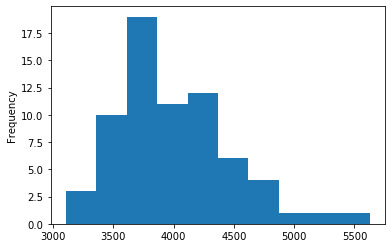

In [139]:
my_df.Density.plot.hist() # histogram

If the code worked properly you should have just created a standard [histogram](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.hist.html#pandas.Series.plot.hist) plot (if you can't see one, ask for help). 

Similarly, we can produce a [Kernel Density Estimate plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.kde.html#pandas.Series.plot.kde) (modifying the limits of the x-axis to match the histogram above):

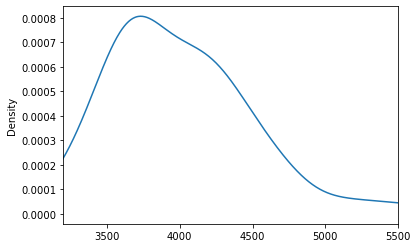

In [140]:
my_df.Density.plot.kde(xlim = (3200,5500)) #kernel density estimate plot

Or a standard [boxplot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.box.html#pandas.Series.plot.box):

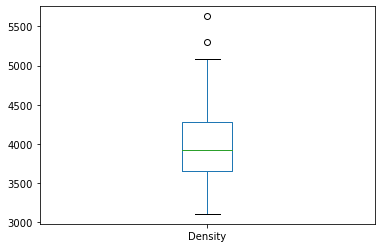

In [141]:
my_df.Density.plot.box() # boxplot

Kind of handy, no? These aren't the _best_ looking plots, but they are all being generated on-the-fly for you by pandas with no more than a cheery `DataFrame.Series.plot.<plot type>`! Since those plots are all just method calls, many of them take optional parameters to change the colour, the notation (scientific or not), and other options. For example, many of the documentation pages linked to above are rather brief, but include a link to [the general options that can be applied to all `Series.plot`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html#pandas.Series.plot) calls.

This is why we like pandas: it allows us to be _constructively lazy_. We don't need to know _how_ a draw a KDE plot (though it always helps if you don't see what you expected), we just need to know that pandas provides a method that will do it for you. And _that_ is why it's always worth having a [look at the documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting). 

We can also plot two variables in a [scatter plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html#pandas.DataFrame.plot.scatter) by applying a plot method to the `DataFrame` (not an individual `Series`):

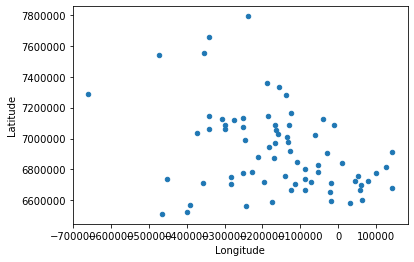

In [142]:
my_df.plot.scatter(x='Longitude', y='Latitude')  #scatter plot

Note how the code above has the form `DataFrame.plot.<plot type>`, not `DataFrame.Series.plot.<plot type>` as in the prior plots. Think about why this then means we need the `x` and `y` arguments. 

Looking at the plot produced, we can see a couple of LSOAs stand out, having much greater numbers of residents relative to the number of households than for other LSOAs. Without producing a simple plot like this, we wouldn't have been able to see this from analysing the numbers.  

We can also vary the size of the point in a plot by some variable:

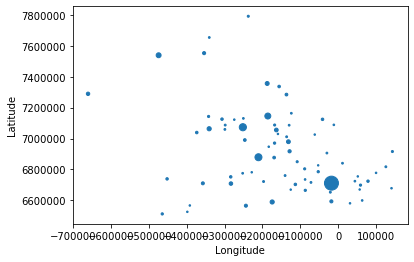

In [152]:
# We divide the population by 50,000 to get a useful point size for each cite
my_df.plot.scatter(x='Longitude', y='Latitude', s=(my_df.Population/50000))

And we can plot subsets of our data without creating a new object. See if you can work out what the following code is doing that is different from the last plot:

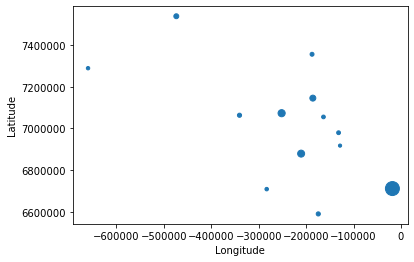

In [154]:
my_df[my_df.Population > my_df.Population.mean()].plot.scatter(x='Longitude', y='Latitude', s=(my_df.Population/50000))

And pandas allows us to create 'less standard' plots, like a [hex bin plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hexbin.html#pandas.DataFrame.plot.hexbin):

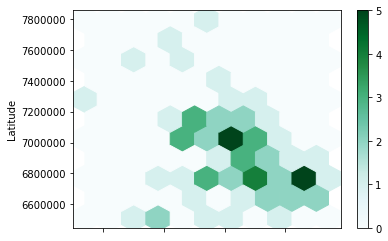

In [153]:
my_df.plot.hexbin(x='Longitude', y='Latitude', gridsize=10)  #hex bin plot

That's just a taste of what the basic plotting functionality of pandas can do. Feel free to explore more yourself but we'll go into more detail, and see [the seaborn package](http://seaborn.pydata.org/index.html), next week. 

# 9. The *Real* Data

That's it for the Cities data. Now that we've built from using our own code to using pandas, we're ready to enter the big leagues! 

For much of the remainder of the module, and for your final report, we will be working with data for London that are aggregated spatially into geographical units known as Lower Super Output Area (**LSOAs**). Hence, we will refer to these data as the ***LSOA data***. 

The boundaries of LSOAs are adminstered by the [Office for National Statistics](https://www.ons.gov.uk/) (ONS) and used to analyse [UK Census](https://census.ukdataservice.ac.uk) and other data. You can read more about [the ONS coding system](https://en.wikipedia.org/wiki/ONS_coding_system), find out about the [UK census geography](https://www.ons.gov.uk/methodology/geography/ukgeographies/censusgeography), and explore [census data at LSOA level for London](http://londondatastore-upload.s3.amazonaws.com/instant-atlas/lsoa-atlas1/atlas.html).   

The data set we have created and which you can use and build on is designed to provide a diverse range of data types so that there is 'something for everyone' -- physical and human geographer alike (and anything in between!) -- to work with. The sources and types of data in the initial LSOA dataset we will examine are: 
* [London Data Store](https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london) provides the geography and some basic census data 
* [OS Greenspace](https://www.ordnancesurvey.co.uk/business-and-government/products/os-open-greenspace.html) provides data about the amount of greenspace
* [OS VectorMap](https://www.ordnancesurvey.co.uk/business-and-government/products/vectormap-district.html) (District) provides data about distances to major roads
* [NOMIS](https://www.nomisweb.co.uk/census/2011) provides more detailed census data
* [InsideAirbnb](http://insideairbnb.com/get-the-data.html) scrapes information from the AirBnB website

Later in term we will see how we can 'add' additional (air pollution) data to this initial dataset, but this is more than enough to be going on with for now! Don't spend too long looking at these links now, as we'll get on with exploring the data themselves. 

We have created a metadate file in Excel that provides information about the variables contained in the LSOA data. Look at that [metadata file](https://github.com/kingsgeocomp/geocomputation/raw/master/Data/LSOA_metadata.xlsx) now (file should auto-download; also available on KEATS). 

Come back to this section later to look at the links make sure you understand how what the data represent, how they were collected, etc. as this is important understanding that will support your data analyses.    

In [ ]:
my_df = pd.read_csv(
    'https://github.com/kingsgeocomp/geocomputation/blob/master/data/LSOA%20Data.csv.gz?raw=true',
    compression='gzip', low_memory=False) # The 'low memory' option means pandas doesn't guess data types

print("Done!")

In [ ]:
# Check the head to see what we have...
my_df.head(3)

### Selecting Rows Using a Category

One thing we couldn't show above with the Cities data was how to select rows using a value in *another* column! 

Let's select all of the LSOAs in the borough (which is a Local Authority District \[LAD\]) of Ealing. LAD names are indicated in the `LAD11NM` column.

In [ ]:
ealingLSOAS = my_df[ my_df.LAD11NM == "Ealing" ]
print("There are " + str(ealingLSOAS.shape[0]) + " LSOAs in Ealing")

We could make our code a little more flexible for that last example, by allowing passing the search criteria (the borough name) as a variable itself:

In [ ]:
b = "City of London"
bLSOAs = my_df[ my_df.LAD11NM == b ]
print("There are " + str(bLSOAs.shape[0]) + " LSOAs in " + b)

Think about how passing the borough name as a variable makes this code more flexible and requires fewer changes in the code to switch between boroughs.  

### Exercises to Test Your Understanding 

#### Descriptive Stats

Calculate the following descriptive statistics for the given variable for all London LSOAs:
1. The maximum value of Median Income 
2. The number households in the LSOA with smallest area
3. The total number (cumulative sum) of Asian/Asian British people in London LSOAs

In [ ]:
#1
#your code here

In [ ]:
#2
#your code here

In [ ]:
#3
#your code here

#### Selecting Data
Write code to select and print: 
1. LSOAs with HHOLDS more than 1 SD greater than the mean 
2. LSOAs in Hackney and Tower Hamlets
3. The 'Social rented' column of LSOAs with population density of greater than 300 people per hectare

In [ ]:
#1
print("LSOAs with HHOLDS more than 1 SD greater than the mean: \n")
#your code here

In [ ]:
#2
print("LSOAs in Hackney and Tower Hamlets: \n")
#your code here

In [ ]:
#3
print("The 'Social rented' column of LSOAs with population density of greater than 300 people per hectare: \n")
#your code here

#### Plotting Data
Create plots of the following:
1. A histogram of the distribution of White people across LSOAs
2. A boxplot of Asian people in LSOAs rotated so the box is horizontal (you will need to google how to rotate!)
3. A scatter plot to compare populations of Asian (horizontal axis) vs White (vertical axis) people in LSOAs 

In [ ]:
#your code here


In [ ]:
#your code here


In [ ]:
#your code here


## Credits!

#### Contributors:
The following individuals have contributed to these teaching materials: James Millington (james.millington@kcl.ac.uk), Jon Reades (jonathan.reades@kcl.ac.uk)

#### License
These teaching materials are licensed under a mix of [The MIT License](https://opensource.org/licenses/mit-license.php) and the [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/).

#### Acknowledgements:
Supported by the [Royal Geographical Society](https://www.rgs.org/HomePage.htm) (with the Institute of British Geographers) with a Ray Y Gildea Jr Award.

#### Potential Dependencies:
This notebook may depend on the following libraries: pandas, matplotlib